In [44]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import normalize

tf.keras.backend.clear_session()  # For easy reset of notebook state.

2.1.0


In [45]:
y = np.loadtxt('coef_mat_givenpulse.dat')
x = np.loadtxt('coef_mat_zero_photon.dat')
y = y**2
#x = np.loadtxt('coef_mat_zero_photon.dat')
#y = np.loadtxt('ionization_probability.dat')
#x = y[:,2]
#print(ion.shape)

#plt.plot(ion[:,2],'o')
print(x.shape)
print(y.shape)
#print(y[0:1])
# standardize dataset
x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y)
#x = StandardScaler().fit_transform(y.reshape(len(y),3))[:,1]
#y = StandardScaler().fit_transform(y.reshape(len(y),3))[:,2]
print("")
print(x.shape)
print(y.shape)
#print(y[0:1])

(100001, 40)
(100001, 40)

(100001, 40)
(100001, 40)


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.05)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.05263)

print("\nx:")
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

print("y:")
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

#y_test_inv = StandardScaler().fit(y_test.reshape(len(y_test),40)).inverse_transform(y_test)
#y_test_inv.shape
#plt.plot(y_test_inv)
len(y_train[:1])


x:
(90000, 40)
(5001, 40)
(5000, 40)
y:
(90000, 40)
(5001, 40)
(5000, 40)


1

In [47]:
inputs = keras.Input(shape=x_train.shape[1:])
print("input_shape = ",inputs.shape)
print("inputs_type = ",inputs.dtype)
dense = layers.Dense(units=64, activation='relu')(inputs)
dense1 = layers.Dense(units=128, activation='relu')(dense)
dense2 = layers.Dense(units=264, activation='relu')(dense1)
dense3 = layers.Dense(units=328, activation='relu')(dense2)
dense4 = layers.Dense(units=428, activation='relu')(dense3)
dense5 = layers.Dense(units=328, activation='relu')(dense4)
dense6 = layers.Dense(units=228, activation='relu')(dense5)
dense7 = layers.Dense(units=128, activation='relu')(dense6)
dense8 = layers.Dense(units=64, activation='relu')(dense7)
outputs = layers.Dense(units=40, activation='linear')(dense8)

input_shape =  (None, 40)
inputs_type =  <dtype: 'float32'>


In [48]:
model = keras.Model(inputs=inputs, outputs=outputs, name='pol_model')
model.summary()

Model: "pol_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 40)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2624      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 264)               34056     
_________________________________________________________________
dense_3 (Dense)              (None, 328)               86920     
_________________________________________________________________
dense_4 (Dense)              (None, 428)               140812    
_________________________________________________________________
dense_5 (Dense)              (None, 328)               14

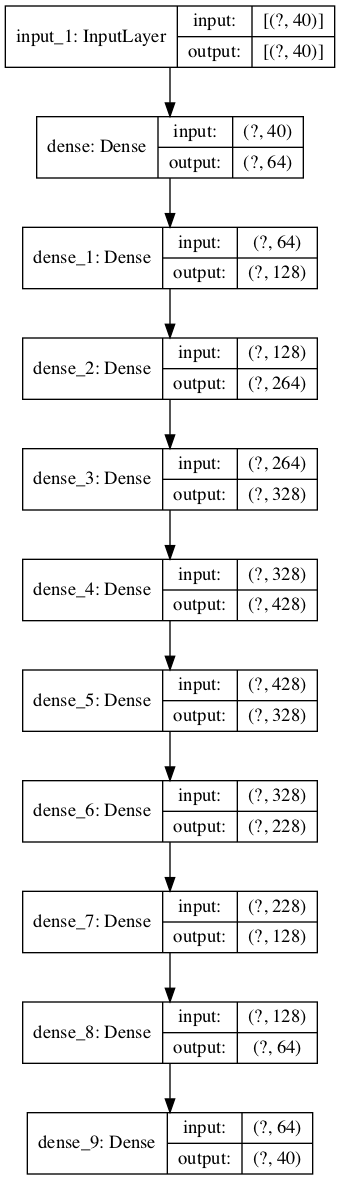

In [49]:
keras.utils.plot_model(model, to_file='model_with_shape_info.png', show_shapes=True)

In [50]:
opt= tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(loss='mean_squared_error',
             optimizer=opt,
             metrics=['accuracy'])

In [51]:
history = model.fit(x_train, y_train,
          epochs=30,
          batch_size=40,
          validation_data=(x_val, y_val))

Train on 90000 samples, validate on 5000 samples
Epoch 1/30
90000/90000 [==============================] - 7s 73us/sample - loss: 1.0006 - accuracy: 0.0479 - val_loss: 0.9596 - val_accuracy: 0.0808
Epoch 2/30
90000/90000 [==============================] - 6s 70us/sample - loss: 1.0006 - accuracy: 0.0359 - val_loss: 0.9596 - val_accuracy: 0.0050
Epoch 3/30
90000/90000 [==============================] - 6s 69us/sample - loss: 1.0006 - accuracy: 0.0647 - val_loss: 0.9596 - val_accuracy: 0.0822
Epoch 4/30
90000/90000 [==============================] - 6s 71us/sample - loss: 1.0006 - accuracy: 0.0628 - val_loss: 0.9592 - val_accuracy: 0.1628
Epoch 5/30
90000/90000 [==============================] - 7s 73us/sample - loss: 1.0006 - accuracy: 0.0933 - val_loss: 0.9592 - val_accuracy: 0.0464
Epoch 6/30
90000/90000 [==============================] - 6s 70us/sample - loss: 1.0005 - accuracy: 0.0788 - val_loss: 0.9593 - val_accuracy: 0.0908
Epoch 7/30
90000/90000 [==============================] -

Train: [1.0004821239948272, 0.16668889]  Test:  [1.0325872077212004, 0.16936612]


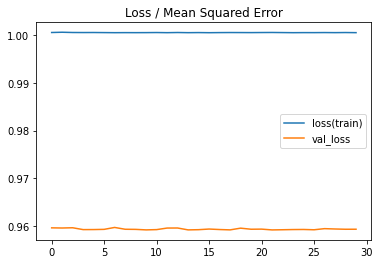

In [52]:
# evaluate the model
train_mse = model.evaluate(x_train, y_train, verbose=0)
test_mse = model.evaluate(x_test, y_test, verbose=0)
print('Train:', train_mse,' Test: ',test_mse)
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='loss(train)')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.savefig('loss.pdf',formate='pdf')
plt.show()

In [53]:
score = model.evaluate(x_test, y_test, batch_size=128)

5001/5001 [==============================] - 0s 16us/sample - loss: 1.0326 - accuracy: 0.1694


In [54]:
#prediction
y_train_predict = model.predict(x_train, batch_size = 1)
y_test_predict = model.predict(x_test, batch_size = 1)

In [55]:
#r2_score
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print("train r2_score = ", r2_train)
print("test r2_score = ", r2_test)

#mean_squared_error
mse_train =  mean_squared_error(y_train, y_train_predict)
mse_test =  mean_squared_error(y_test, y_test_predict)
print("\ntrain mean_squared_error = ", mse_train)
print("test mean_squared_error = ", mse_test)

#mean_absolute_error
mae_train = mean_absolute_error(y_train, y_train_predict)
mae_test = mean_absolute_error(y_test, y_test_predict)
print("\ntrain mean_absolute_error", mae_train)
print("test mean_absolute_error", mae_test)

train r2_score =  -2.496991974962337e-05
test r2_score =  -0.00019297726797449233

train mean_squared_error =  1.0004821169365803
test mean_squared_error =  1.0325871965768816

train mean_absolute_error 0.6555108007230377
test mean_absolute_error 0.6601250905048625


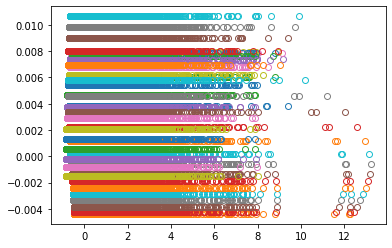

In [56]:
plt.plot(y_test[:],y_test_predict[:], "o",markerfacecolor='none')
plt.show()

In [57]:
#plt.plot(y_test[:],y_test_predict[:], "o")
#plt.plot(y_test_predict[:], "o", markersize=3)

y_pre_inv = StandardScaler().fit(y_test_predict).inverse_transform(y_test_predict)

plt.plot(y_test_inv,y_test_predict, "o")
#plt.plot(y_test_predict[0:100], "o", markersize=3)
#plt.show()
plt.savefig('g.pdf',formate='pdf')

NameError: name 'y_test_inv' is not defined

In [ ]:
error = y_test_predict - y_test
plt.hist(error, bins = 2)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")
plt.savefig('error_bin.pdf',formate='pdf')

In [ ]:
a = np.array([-1.499977111,-0.7369246482,0.511210441,-8.26997781E-002,6.553E-002,-0.56206,-0.90591,0.3578,0.3586])
a
a.shape
a
#y_test_predict = model.predict(a)
#y_pre_inv = StandardScaler().fit(y_test_predict).inverse_transform(y_test_predict)
#y_pre_inv